In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

In [5]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy import create_engine, inspect 

In [8]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [9]:
conn = engine.connect()

In [11]:
#view all tables using inspector
inspector = inspect(engine)

In [24]:
inspector.get_table_names()

['measurement', 'station']

In [26]:
for column in inspector.get_columns("measurement"):
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
query = '''
        SELECT 
            *
        FROM
            measurement

        '''

In [14]:
df = pd.read_sql(query, conn)
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
id         19550 non-null int64
station    19550 non-null object
date       19550 non-null object
prcp       18103 non-null float64
tobs       19550 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB


In [17]:
df.describe()

,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


In [27]:
query2 = '''
        SELECT 
            *
        FROM
            station

        '''

In [28]:
for column in inspector.get_columns("station"):
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
df2 = pd.read_sql(query2, conn)

In [22]:
df2

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
id           9 non-null int64
station      9 non-null object
name         9 non-null object
latitude     9 non-null float64
longitude    9 non-null float64
elevation    9 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 512.0+ bytes


In [23]:
df2.describe()

,id,latitude,longitude,elevation
count,9.000000,9.000000,9.000000,9.000000
mean,5.000000,21.393826,-157.867098,60.977778
std,2.738613,0.086442,0.103873,103.465547
min,1.000000,21.271600,-158.011100,0.900000
25%,3.000000,21.333100,-157.975100,7.000000
50%,5.000000,21.393400,-157.837400,14.600000
75%,7.000000,21.451670,-157.802500,32.900000
max,9.000000,21.521300,-157.711390,306.600000


In [29]:
#get the last date
df["date"].max()

'2017-08-23'

In [31]:
#use datetime to get one year back 
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

In [40]:
query3 = """
            SELECT 
                date,
                prcp
            FROM
                measurement
            WHERE
                date > '2016-08-23'
            """

In [41]:
df3=  pd.read_sql(query3, conn).sort_values('date')

In [42]:
df3.head()

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


In [46]:
df3.tail()

,date,prcp
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00
2222,2017-08-23,0.45


In [49]:
df3["Date"] = pd.to_datetime(df3.date)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2222
Data columns (total 3 columns):
date    2223 non-null object
prcp    2015 non-null float64
Date    2223 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 69.5+ KB


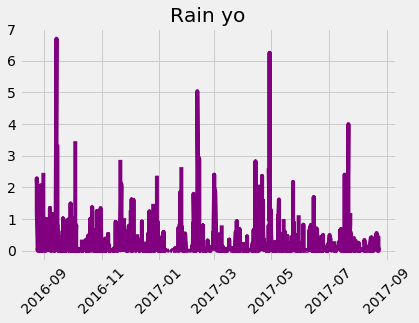

<Figure size 432x288 with 0 Axes>

In [52]:
#create line graph for date and prcp
plt.plot(df3.Date, df3. prcp, color = "purple")
plt.xticks(rotation = 45)
plt.title("Rain yo")
plt.figure()
plt.show()

In [54]:
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [58]:
df.groupby('station').size().sort_values()

station
USC00518838     511
USC00517948    1372
USC00511918    1979
USC00514830    2202
USC00516128    2612
USC00519523    2669
USC00513117    2709
USC00519397    2724
USC00519281    2772
dtype: int64

In [62]:
query4 = """
            SELECT 
                *
            FROM
                measurement
            WHERE 
                station = 'USC00519281' AND
                date > '2016-08-23'
            """

In [67]:
df5 = pd.read_sql(query4, conn)
df5.head()

,id,station,date,prcp,tobs
0,14609,USC00519281,2016-08-24,2.15,77.0
1,14610,USC00519281,2016-08-25,0.06,80.0
2,14611,USC00519281,2016-08-26,0.01,80.0
3,14612,USC00519281,2016-08-27,0.12,75.0
4,14613,USC00519281,2016-08-28,0.60,73.0


In [70]:
len(df5)

351

In [71]:
np.sqrt(351)

18.734993995195193

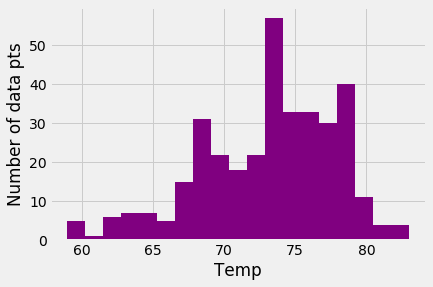

In [72]:
plt.hist(df5.tobs, bins = 19, color = 'purple')
plt.xlabel("Temp")
plt.ylabel("Number of data pts")
plt.show()